#### Importing All Required Libraries

In [4]:
from osgeo import gdal
import os
import matplotlib.pyplot as plt

#### Changing Directory and Opening Data Source

In [5]:
os.chdir(r'D:\Course\Python Assignments\Geospatial Analysis using Python\Raster Data\True Color Band')
dataset_source = gdal.Open('Band 2.tif')

In [6]:
band = dataset_source.GetRasterBand(1)
print(band)
count = dataset_source.RasterCount
count

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000022A0464BA80> >


1

#### Reading Information and Plotting Raster Data

{'AREA_OR_POINT': 'Point'}


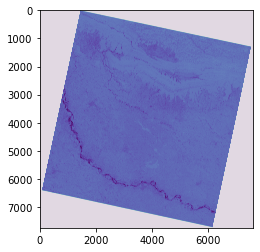

In [7]:
projection = dataset_source.GetProjection()
metadata = dataset_source.GetMetadata()
print(metadata)
band = dataset_source.GetRasterBand(1)
array = band.ReadAsArray()
array
graph = plt.imshow(array, cmap='twilight')

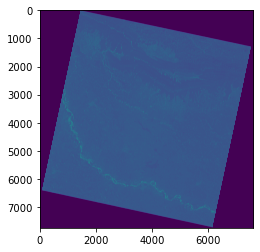

In [8]:
plt.figure()
plt.imshow(array)

#### All in One Information about Raster Data

In [9]:
!gdalinfo "Band 2.TIF"

Driver: GTiff/GeoTIFF
Files: Band 2.TIF
Size is 7591, 7741
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 44N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 44N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",81,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER

#### Importing ALl Libraries For Layer Stacking of Raster Data

In [10]:
import os
from osgeo import gdal

In [11]:
band2 = 'Band 2.TIF'
band3 = 'Band 3.TIF'
band4 = 'Band 4.TIF'
dataset = gdal.Open(band2)
input_band = dataset.GetRasterBand(1)

#### Creating Driver Which helps to Create New Band

In [12]:
driver = gdal.GetDriverByName('GTiff')

In [13]:
output_dataset = driver.Create('true_color.tif', input_band.XSize, input_band.YSize, 3, input_band.DataType)

#### Getting Some Information

In [14]:
projection = dataset.GetProjection()
output_dataset.SetProjection(projection)
geo_transform = dataset.GetGeoTransform()
output_dataset.SetGeoTransform(geo_transform)

0

#### Process of Layer Stacking

In [15]:
input_data = input_band.ReadAsArray()
output_band = output_dataset.GetRasterBand(3)
output_band.WriteArray(input_data)

dataset = gdal.Open(band3)
output_band = output_dataset.GetRasterBand(2)
output_band.WriteArray(dataset.ReadAsArray())

0

In [16]:
output_dataset.GetRasterBand(1).WriteArray(gdal.Open(band4).ReadAsArray())
output_dataset.FlushCache()
for i in range(1, 4):
    output_dataset.GetRasterBand(i).ComputeStatistics(False)
output_dataset.BuildOverviews('average', [2, 4, 8, 16, 32])
del output_dataset

### Layer Mosaicing

In [ ]:
from osgeo import gdal
import glob
import subprocess

In [14]:
os.chdir(r'D:\Course\Python Assignments\Geospatial Analysis using Python\Raster Data\Massachusetts')
# list all files in directory that match pattern
demList = glob.glob("O42*.tif")
print(demList)

# Build virtual raster and convert to geotiff
virtual = gdal.BuildVRT("merged.vrt", demList)
gdal.Translate("mergedDEM2.tif", virtual, xRes = 10, yRes = -10)
virtual = None

['O4207063.NES.916802.tif', 'O4207063.NWS.916803.tif']
